In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data, drop dummy column
airbnb = pd.read_csv('airbnb_clean_2.csv')
airbnb.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

# set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
#pd.set_option('display.max_rows', None)

In [3]:
airbnb.sample(5)

,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num
9892,16190576,Treehouse Resnice,4.90,11,105727139,"Cerovac Barilovićki, Karlovačka županija, Croatia",10371.00,Croatia (Hrvatska),1,2,4,0,0,0,2 00 pm - 6 00 pm,11 00 am,1467.75,False,True,False,False,True,False,True,False,False,False,False,False,False,5,6,7
11244,50088584,Spacious Boho 2BR Apt in the heart of Tbilisi,4.95,43,78831560,"T'bilisi, Tbilisi, Georgia",14027.00,Georgia,1,2,4,0,2,0,After 4 00 pm,10 00 am,5156.99,False,True,False,False,True,True,True,True,False,False,True,True,True,10,8,10
12232,52547041,Mountain Eco Shelter too,5.00,32,424455167,"Funchal, Madeira, Portugal",8991.00,Portugal,1,1,2,0,1,0,3 00 pm - 6 00 pm,11 00 am,9827.16,False,False,False,False,True,True,True,True,False,False,False,True,True,6,6,10
12760,21806856,Eco beach +surprise half board bf & lunch/ dinner,4.78,51,12105341,"Phuket, Thailand",12272.00,Thailand,1,1,3,0,0,0,3 00 pm - 10 00 pm,11 00 am,341.31,False,True,False,False,False,True,True,False,True,False,True,True,False,7,7,10
6874,15751754,"LUXURY TOWNHOUSE IN GEISHA DISTRICT, GION",4.98,192,9613497,"Kyoto, Kyoto Prefecture, Japan",26448.00,Japan,1,5,5,0,3,0,2 00 pm - 10 00 pm,10 00 am,169.03,True,True,False,False,True,True,False,False,False,False,True,True,True,9,6,12


In [4]:
airbnb.columns

Index(['id', 'name', 'rating', 'reviews', 'host_id', 'address', 'price',
       'country', 'bathrooms', 'beds', 'guests', 'toilets', 'bedrooms',
       'studios', 'checkin', 'checkout', 'usd_price', 'tv', 'wifi',
       'chromecast', 'refrigerator', 'kitchen', 'view', 'parking', 'workspace',
       'pool', 'gym', 'no_pets', 'no_smoking', 'no_parties_or_events',
       'house_rules_num', 'img_links_num', 'amenities_num'],
      dtype='object')

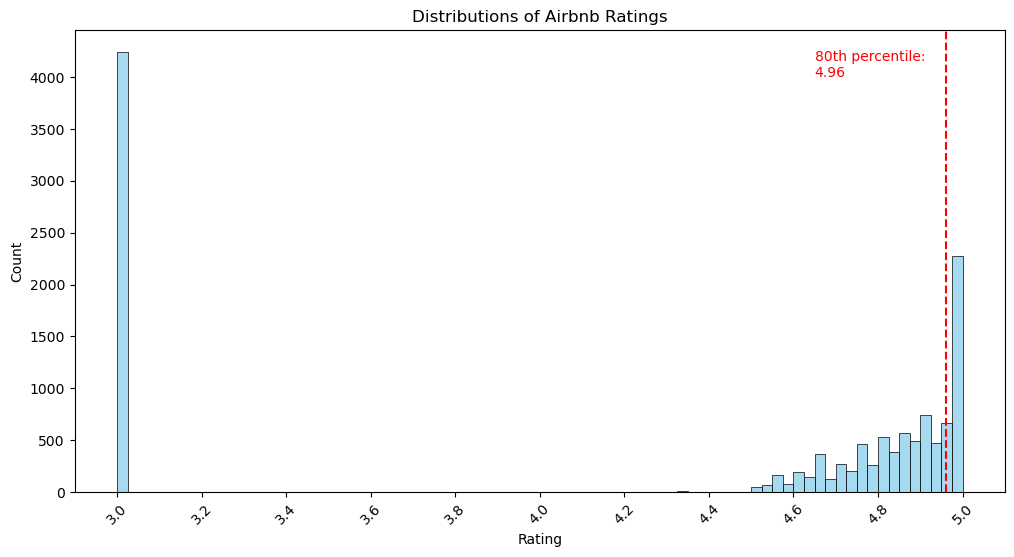

In [5]:
# Look at the distribution of ratings to decide what is considered a high rating.

# calculate the 80th percentile
high_rating_threshold = airbnb['rating'].quantile(0.80)

# initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# plot histogram with the specified bins
sns.histplot(airbnb['rating'], bins = 80, kde = False, ax = ax, color = 'skyblue', edgecolor='black', linewidth=0.5)
ax.set_title('Distributions of Airbnb Ratings')
ax.set_ylabel('Count')
ax.set_xlabel('Rating')

# Add a line for the 80th percentile
ax.axvline(high_rating_threshold, color = 'red', linestyle = 'dashed')
ax.text(4.65, 4000,f'80th percentile:\n{high_rating_threshold:.2f}', color = 'red')

# set xticks
xticks = np.arange(3, airbnb['rating'].max()+0.2, 0.2)
ax.set_xticks(xticks)
plt.xticks(rotation=45)

# show plot
plt.show()

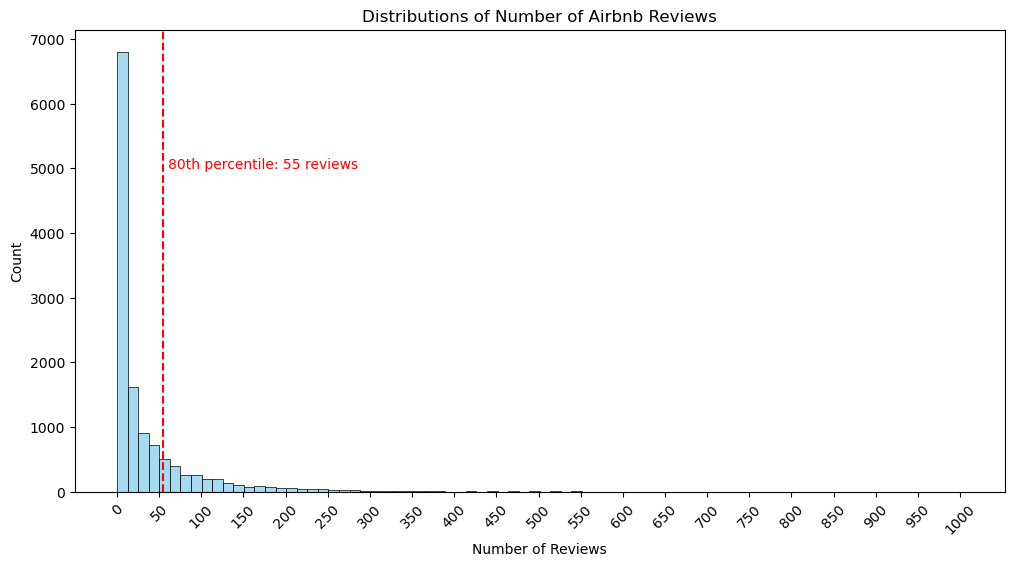

In [6]:
# Look at the distribution of reviews to decide what is considered a high number of reviews. This is as proxy indicator for a popular (or infamous listing)

# calculate the 90th percentile
high_reviews_threshold = int(airbnb['reviews'].quantile(0.80))

# initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# plot histogram with the specified bins
sns.histplot(airbnb['reviews'], bins = 80, kde = False, ax = ax, color = 'skyblue', edgecolor='black', linewidth=0.5)
ax.set_title('Distributions of Number of Airbnb Reviews')
ax.set_ylabel('Count')
ax.set_xlabel('Number of Reviews')

# Add a line for the 90th percentile
ax.axvline(high_reviews_threshold, color = 'red', linestyle = 'dashed')
ax.text(60, 5000,f'80th percentile: {high_reviews_threshold} reviews', color = 'red')

# set x-ticks
xticks = range(0, airbnb['reviews'].max()+10, 50)
ax.set_xticks(xticks)
plt.xticks(rotation=45)

#show plot
plt.show()

In [7]:
# label listings that have rating and number of reviews at and above their respective 80th percentiles as stellar
airbnb['stellar'] = (airbnb['reviews'] >= high_reviews_threshold) & (airbnb['rating'] >= high_rating_threshold)

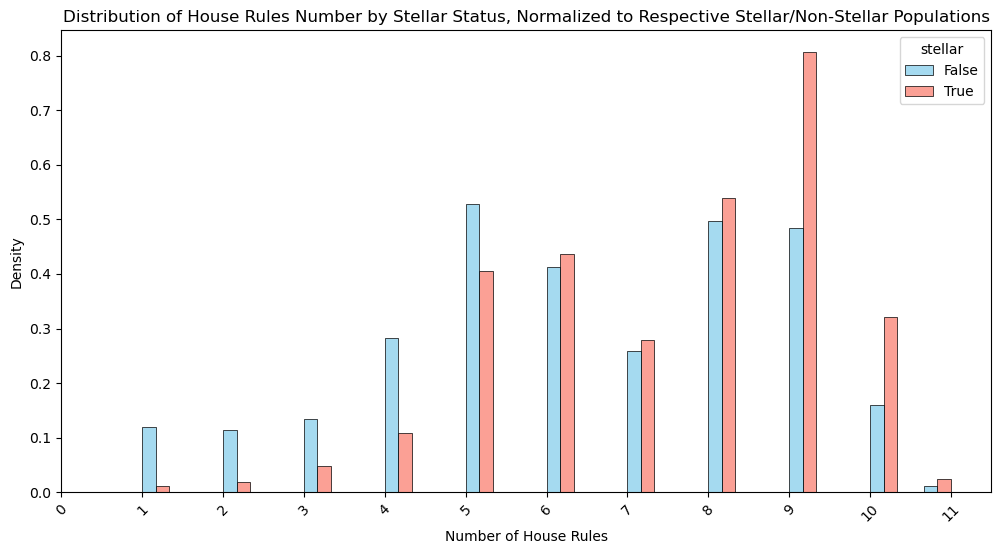

In [8]:
#Study the number of house rules stellar and non-stellar listings have

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot jitter plot using seaborn with hue for 'stellar'
sns.histplot(data=airbnb, x='house_rules_num', hue = 'stellar', multiple = 'dodge',kde=False, palette=['skyblue', 'salmon'], edgecolor='black', linewidth=0.5,bins=30, stat = 'density',common_norm=False)

# Set titles and labels
ax.set_title('Distribution of House Rules Number by Stellar Status, Normalized to Respective Stellar/Non-Stellar Populations')
ax.set_xlabel('Number of House Rules')
ax.set_ylabel('Density')

# set x-ticks
xticks = range(0, 12, 1)
ax.set_xticks(xticks)
plt.xticks(rotation=45)

# Show plot
plt.show()

# It is quite clear that stellar listings seem to have more rules!

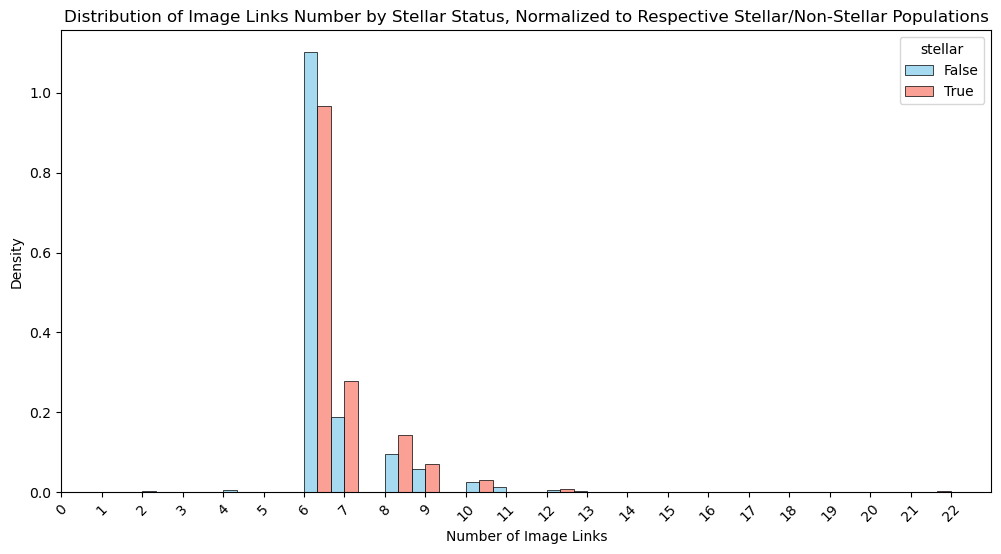

In [9]:
#Study the number of image links stellar and non-stellar listings have

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot jitter plot using seaborn with hue for 'stellar'
sns.histplot(data=airbnb, x='img_links_num', hue = 'stellar', multiple = 'dodge',kde=False, palette=['skyblue', 'salmon'], edgecolor='black', linewidth=0.5, bins=30, stat = 'density',common_norm=False)

# Set titles and labels
ax.set_title('Distribution of Image Links Number by Stellar Status, Normalized to Respective Stellar/Non-Stellar Populations')
ax.set_xlabel('Number of Image Links')
ax.set_ylabel('Density')

# set x-ticks
xticks = range(0, 23, 1)
ax.set_xticks(xticks)
plt.xticks(rotation=45)

# Show plot
plt.show()

# Both have a right skew, but it is also quite clear that stellar listings seem to have more images!

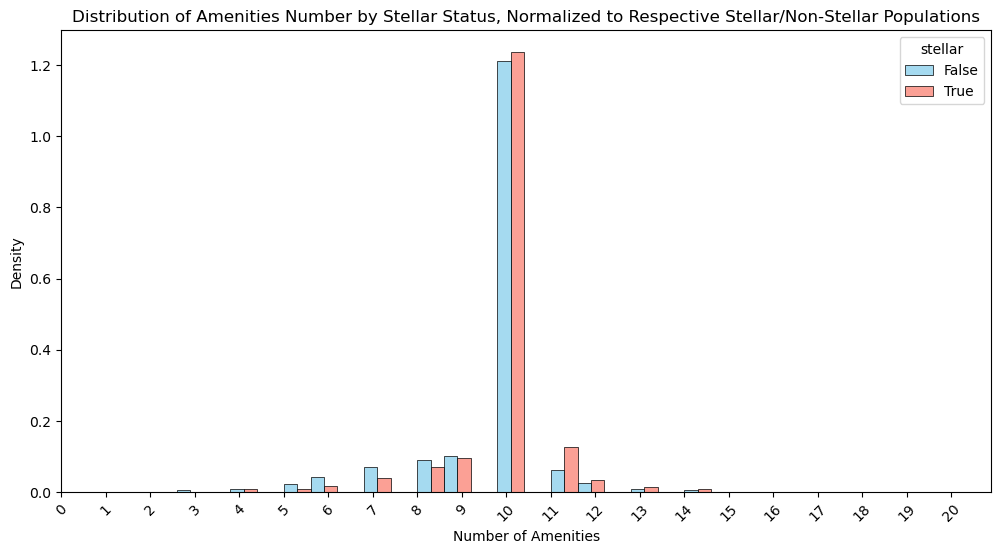

In [10]:
#Study the number of amneties stellar and non-stellar listings have

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot jitter plot using seaborn with hue for 'stellar'
sns.histplot(data=airbnb, x='amenities_num', hue = 'stellar', multiple = 'dodge',kde=False, palette=['skyblue', 'salmon'], edgecolor='black', linewidth=0.5, bins=30, stat = 'density',common_norm=False)

# Set titles and labels
ax.set_title('Distribution of Amenities Number by Stellar Status, Normalized to Respective Stellar/Non-Stellar Populations')
ax.set_xlabel('Number of Amenities')
ax.set_ylabel('Density')

# set x-ticks
xticks = range(0, 21, 1)
ax.set_xticks(xticks)
plt.xticks(rotation=45)

# Show plot
plt.show()

# Both have a right skew, but it is also quite clear that stellar listings seem to have more images!


In [11]:
airbnb.columns

Index(['id', 'name', 'rating', 'reviews', 'host_id', 'address', 'price',
       'country', 'bathrooms', 'beds', 'guests', 'toilets', 'bedrooms',
       'studios', 'checkin', 'checkout', 'usd_price', 'tv', 'wifi',
       'chromecast', 'refrigerator', 'kitchen', 'view', 'parking', 'workspace',
       'pool', 'gym', 'no_pets', 'no_smoking', 'no_parties_or_events',
       'house_rules_num', 'img_links_num', 'amenities_num', 'stellar'],
      dtype='object')

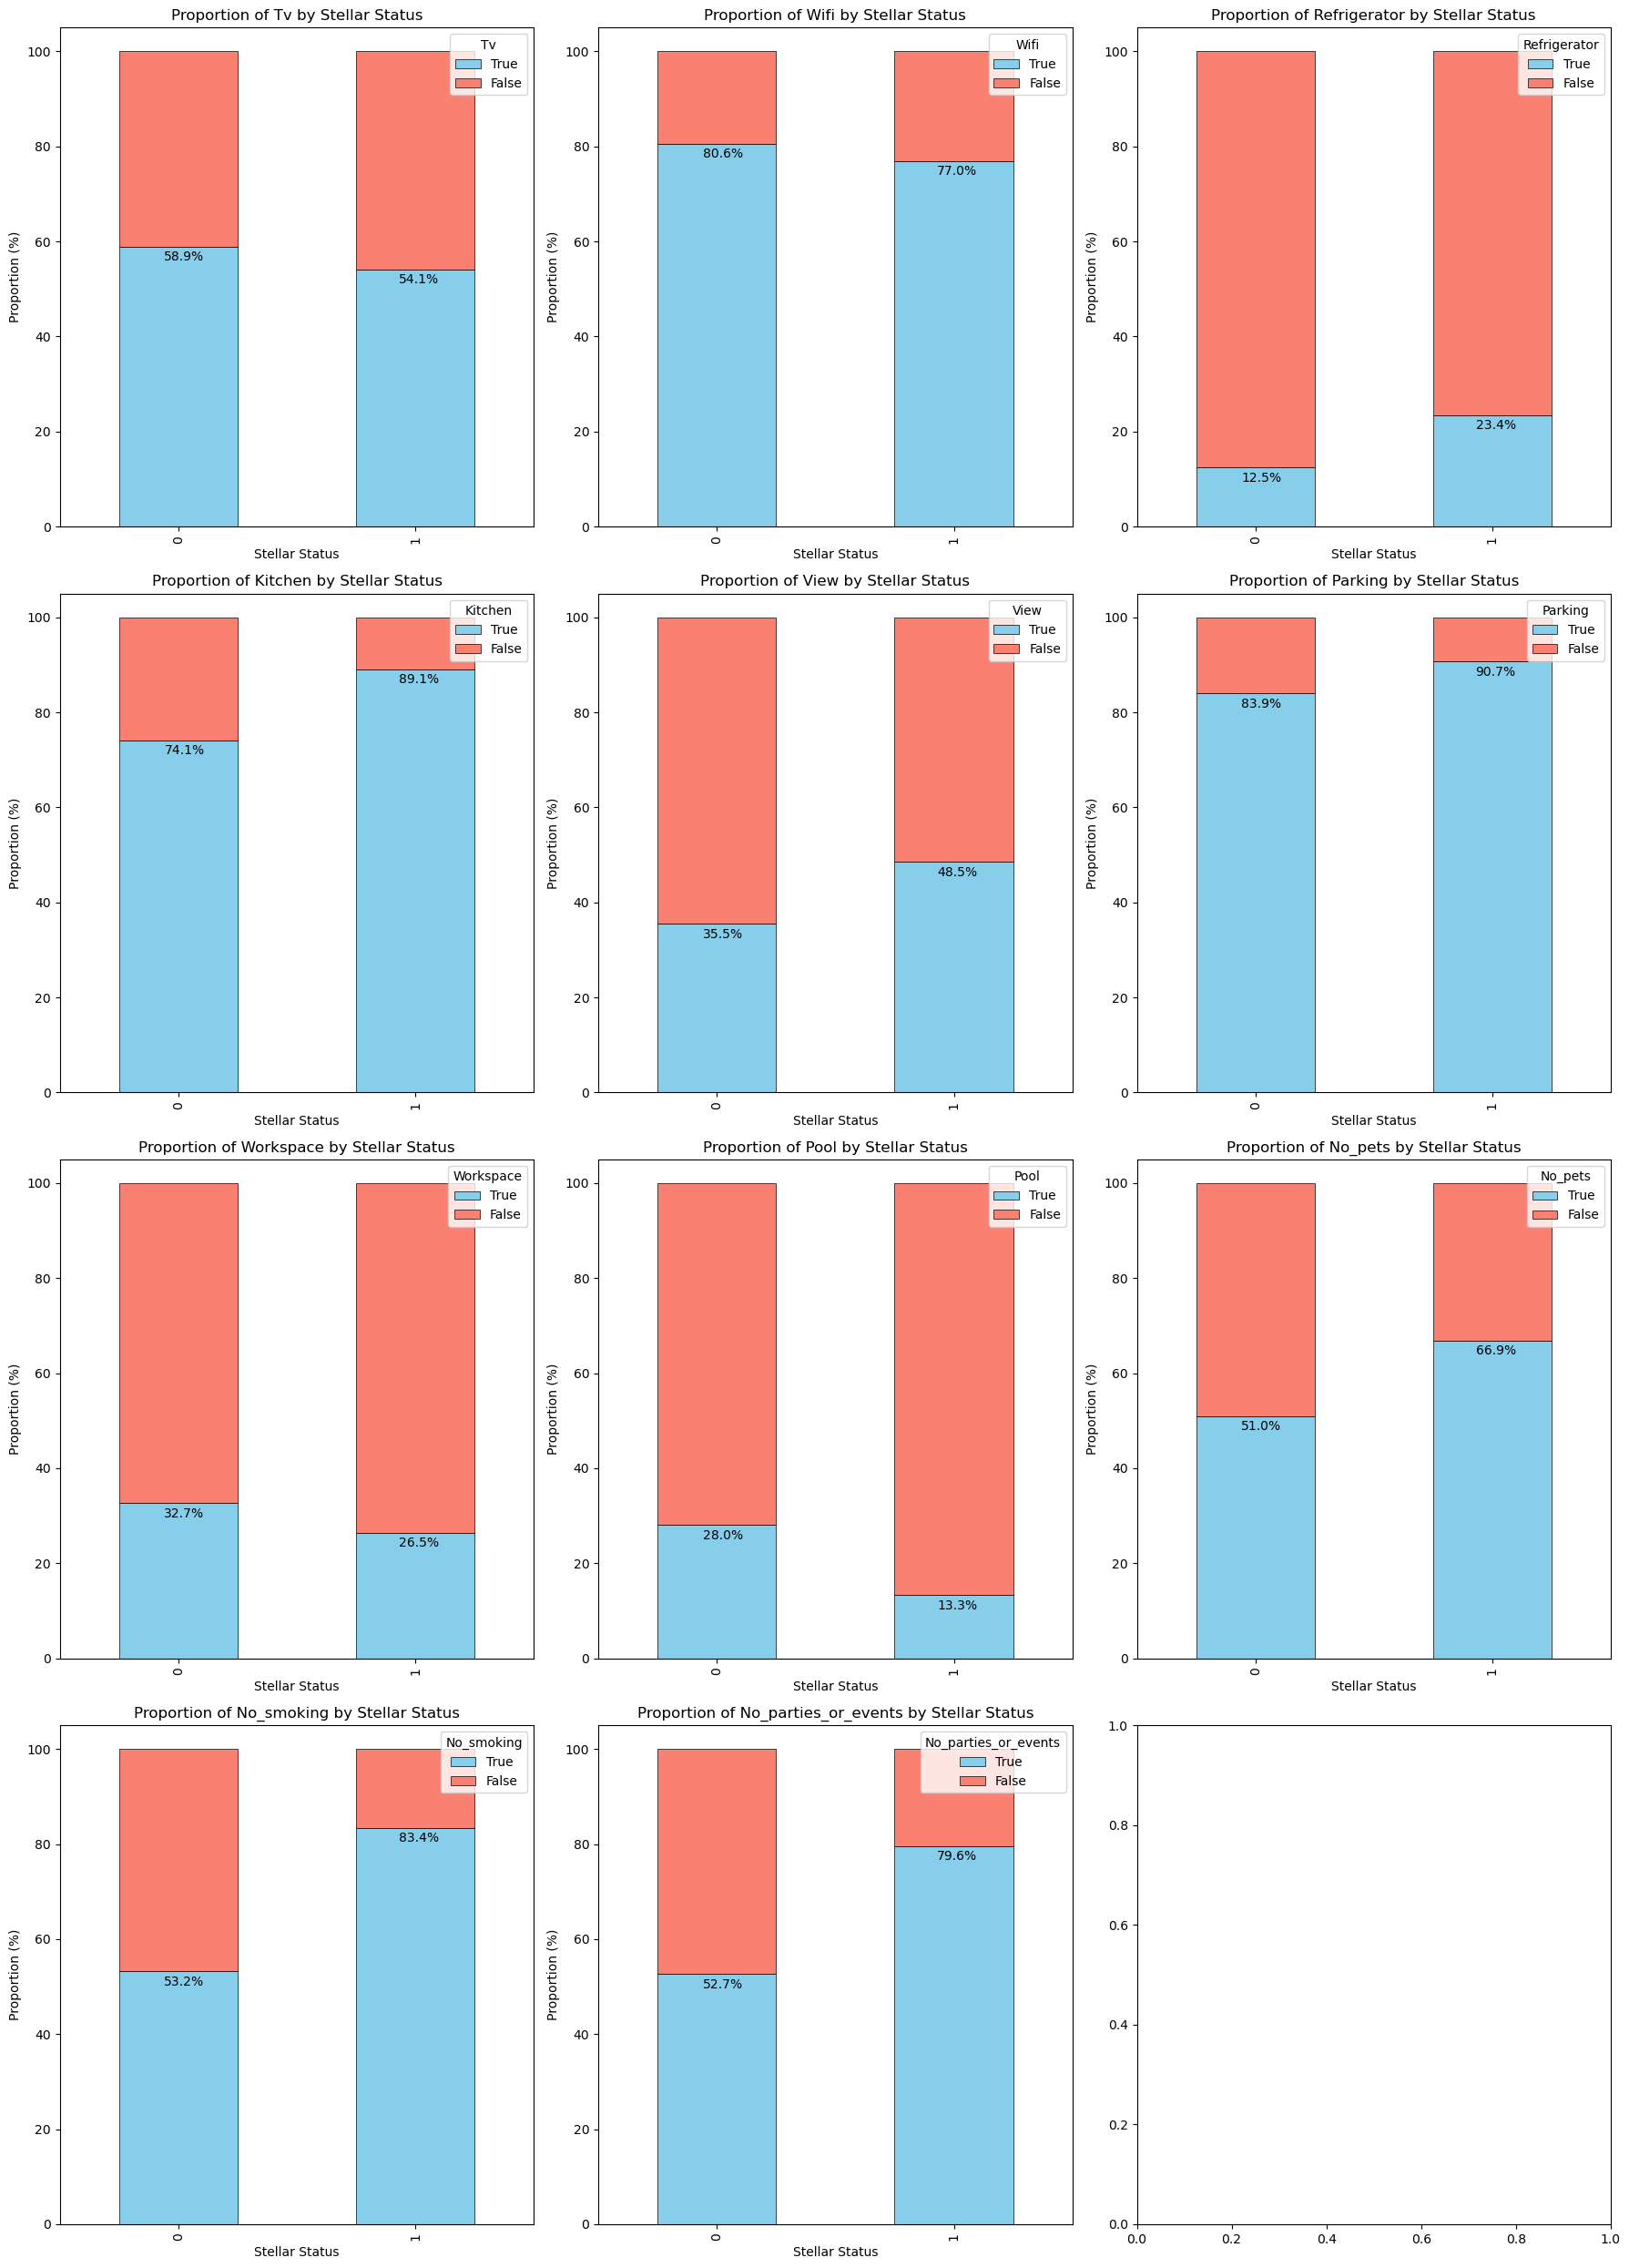

In [12]:
# # List of binary columns
binary_columns = ['tv', 'wifi', 'refrigerator', 'kitchen', 'view', 
                  'parking', 'workspace', 'pool','no_pets', 'no_smoking', 'no_parties_or_events'] # didn't take gym or chromecast as hardly any listings have those

# Initialize a figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 25))
axes = axes.flatten()

# Plot each binary column
for i, column in enumerate(binary_columns):
    # Calculate the proportion of True/False for each group
    prop_df = airbnb.groupby(['stellar', column]).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
    
    # Reset the index to make 'stellar' a column again
    prop_df.reset_index(inplace=True)
    
    # Ensure the columns are ordered with True first
    prop_df = prop_df[['stellar', True, False]]
    
    # Plot the stacked bar chart
    prop_df.plot(kind='bar', stacked=True, ax=axes[i], color=['skyblue', 'salmon'], edgecolor='black', linewidth=0.5)
    
    axes[i].text(-0.06, prop_df[1][0]-3, f"{prop_df[1][0]:.1f}%")
    axes[i].text(0.93, prop_df[1][1]-3, f"{prop_df[1][1]:.1f}%")
    
    # Set titles and labels
    axes[i].set_title(f'Proportion of {column.capitalize()} by Stellar Status')
    axes[i].set_xlabel('Stellar Status')
    axes[i].set_ylabel('Proportion (%)')
    axes[i].legend(title=column.capitalize(), loc='upper right')

    
# Adjust layout
plt.tight_layout()
plt.show()

# # Stellar listings tend to...
# TV: Not have TVs
# Wifi: Not have Wifi
# Refrigerator: Have a refrigerator
# Kitchen: Have a kitchen
# View: Have a view
# Parking: Have Parking
# Workspace: Not have Workspace
# Pool: Not have a pool

# No smoking rule: Have this rule
# No pets rule: Have this rule
# No parties or events rule: Have this rule

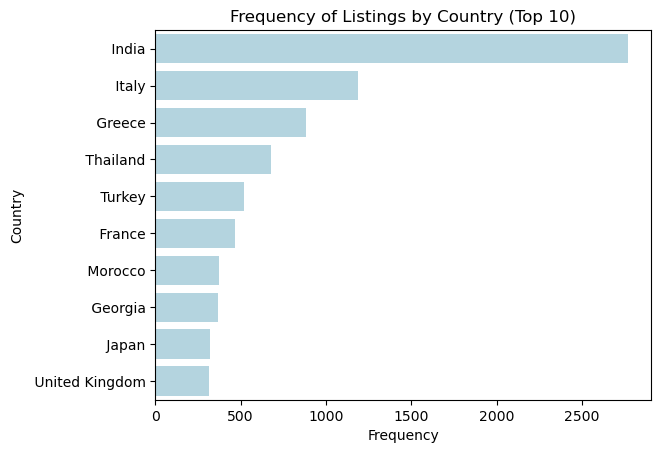

In [13]:
# typing the country as categories
airbnb['country'] = airbnb['country'].astype('category')

# pulling out the top 10 countries that have the most listings
top_10_countries = airbnb['country'].value_counts().index[:10]

# filtering out the main df to only those rows whose country is in the top 10 countries
df_top_10_countries = airbnb[airbnb['country'].isin(top_10_countries)]

# create a countplot
sns.countplot(y='country', data=df_top_10_countries, order=top_10_countries, color = 'lightblue')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Frequency of Listings by Country (Top 10)')
plt.show()

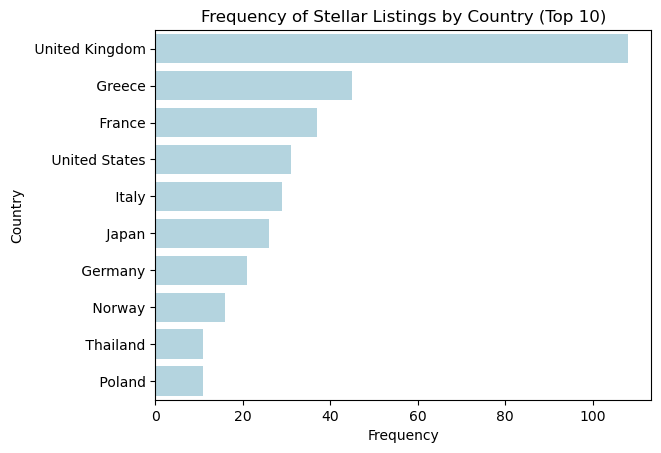

In [14]:
# typing the country as categories
airbnb_best = airbnb[airbnb['stellar'] == True]

# # pulling out the top 10 countries that have the most listings
top_10_countries = airbnb_best['country'].value_counts().index[:10]

# filtering out the main df to only those rows whose country is in the top 10 countries
df_top_10_countries = airbnb_best[airbnb_best['country'].isin(top_10_countries)]

# create a countplot
sns.countplot(y='country', data=df_top_10_countries, order=top_10_countries, color = 'lightblue')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Frequency of Stellar Listings by Country (Top 10)')
plt.show()

In [22]:
airbnb_by_country_stellar = airbnb.groupby(['country', 'stellar'])

In [41]:
airbnb_country_stellar_for_plot = airbnb_by_country_stellar['country'].count().unstack().apply(lambda x : x/x.sum() * 100, axis =1).sort_values(by = True, ascending = False).head(30)
airbnb_country_stellar_for_plot = airbnb_country_stellar_for_plot.reindex([True,False], axis = 1)

<Axes: xlabel='country'>

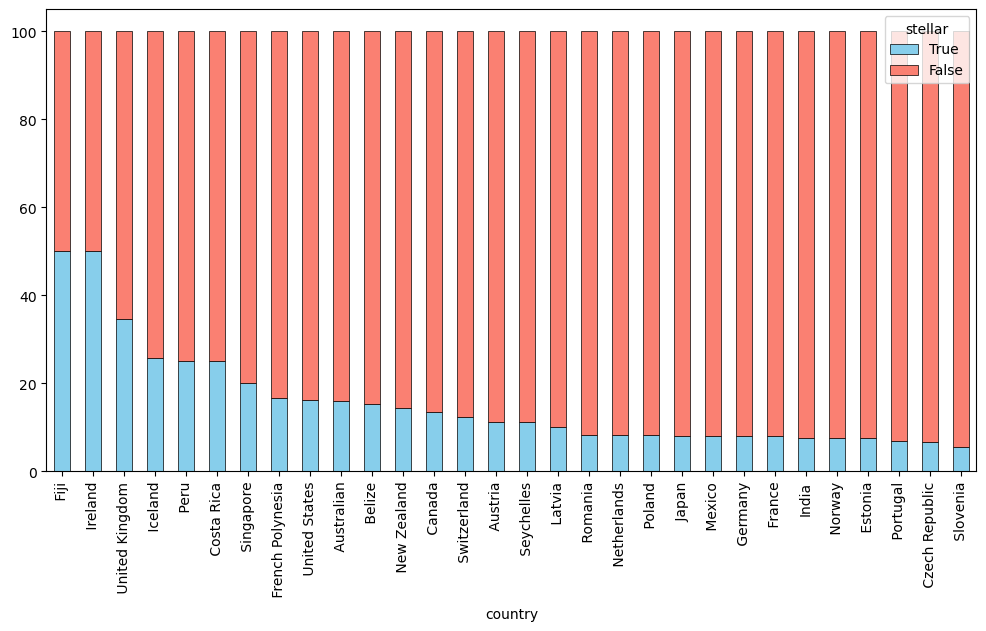

In [42]:
# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
airbnb_country_stellar_for_plot.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'], edgecolor='black', linewidth=0.5)